In [9]:
import config
import torch
import torch.optim as optim

from model import YOLOv3
from tqdm import tqdm
from utils import (
    mean_average_precision,
    cells_to_bboxes,
    get_evaluation_bboxes,
    save_checkpoint,
    load_checkpoint,
    check_class_accuracy,
    get_loaders,
    plot_couple_examples,
    non_max_suppression
)
from loss import YoloLoss
import warnings
warnings.filterwarnings("ignore")

torch.backends.cudnn.benchmark = True


def train_fn(train_loader, model, optimizer, loss_fn, scaler, scaled_anchors):
    loop = tqdm(train_loader, leave=True)
    losses = []
    for batch_idx, (x, y) in enumerate(loop):
        x = x.to(config.DEVICE)
        y0, y1, y2 = (
            y[0].to(config.DEVICE),
            y[1].to(config.DEVICE),
            y[2].to(config.DEVICE),
        )

        with torch.cuda.amp.autocast():
            out = model(x)
            loss = (
                loss_fn(out[0], y0, scaled_anchors[0])
                + loss_fn(out[1], y1, scaled_anchors[1])
                + loss_fn(out[2], y2, scaled_anchors[2])
            )

        losses.append(loss.item())
        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # update progress bar
        mean_loss = sum(losses) / len(losses)
        loop.set_postfix(loss=mean_loss)

=> Loading checkpoint


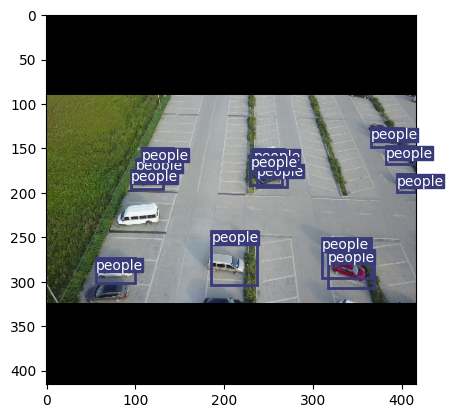

100%|██████████████████████████████████████████████████████████████████| 3013/3013 [10:59<00:00,  4.57it/s, loss=0.899]


=> Saving checkpoint
Currently epoch 0


100%|██████████████████████████████████████████████████████████████████████████████| 6634/6634 [03:26<00:00, 32.12it/s]


Class accuracy is: 100.000000%
No obj accuracy is: 99.513542%
Obj accuracy is: 36.163002%


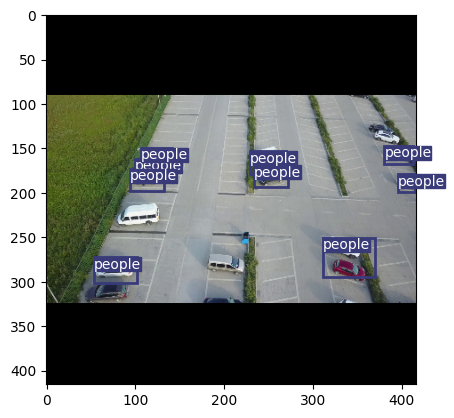

100%|██████████████████████████████████████████████████████████████████| 3013/3013 [10:48<00:00,  4.65it/s, loss=0.897]


=> Saving checkpoint
Currently epoch 1


100%|██████████████████████████████████████████████████████████████████████████████| 6634/6634 [03:23<00:00, 32.53it/s]


Class accuracy is: 100.000000%
No obj accuracy is: 99.360031%
Obj accuracy is: 41.316261%


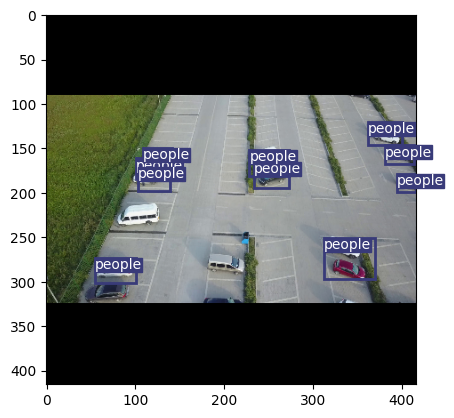

100%|██████████████████████████████████████████████████████████████████| 3013/3013 [10:56<00:00,  4.59it/s, loss=0.889]


=> Saving checkpoint
Currently epoch 2


100%|██████████████████████████████████████████████████████████████████████████████| 6634/6634 [03:22<00:00, 32.82it/s]


Class accuracy is: 100.000000%
No obj accuracy is: 99.462151%
Obj accuracy is: 37.956028%


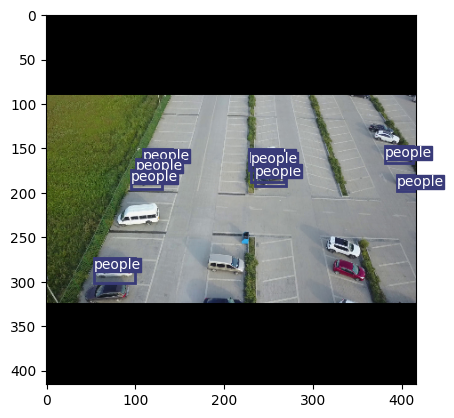

100%|██████████████████████████████████████████████████████████████████| 3013/3013 [10:46<00:00,  4.66it/s, loss=0.882]


=> Saving checkpoint
Currently epoch 3


100%|██████████████████████████████████████████████████████████████████████████████| 6634/6634 [03:24<00:00, 32.51it/s]


Class accuracy is: 100.000000%
No obj accuracy is: 99.545822%
Obj accuracy is: 35.921574%


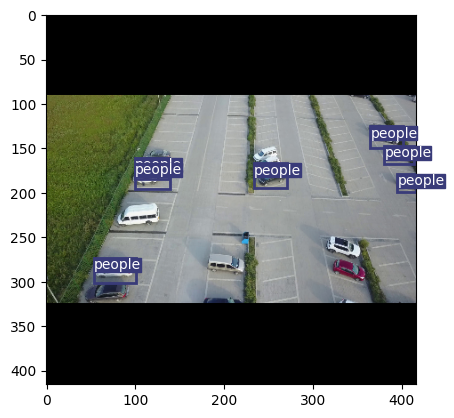

100%|██████████████████████████████████████████████████████████████████| 3013/3013 [10:57<00:00,  4.58it/s, loss=0.877]


=> Saving checkpoint
Currently epoch 4


100%|██████████████████████████████████████████████████████████████████████████████| 6634/6634 [03:22<00:00, 32.76it/s]


Class accuracy is: 100.000000%
No obj accuracy is: 99.509987%
Obj accuracy is: 37.052776%


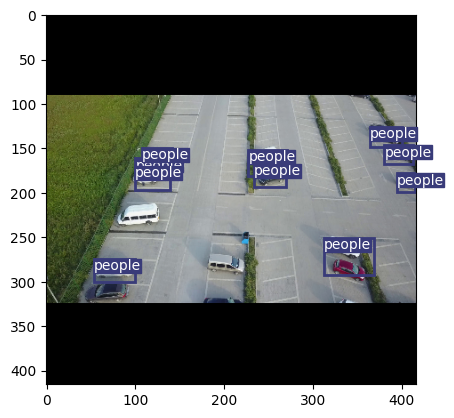

100%|██████████████████████████████████████████████████████████████████| 3013/3013 [10:56<00:00,  4.59it/s, loss=0.872]


=> Saving checkpoint
Currently epoch 5


100%|██████████████████████████████████████████████████████████████████████████████| 6634/6634 [03:16<00:00, 33.82it/s]


Class accuracy is: 100.000000%
No obj accuracy is: 99.524620%
Obj accuracy is: 36.906422%


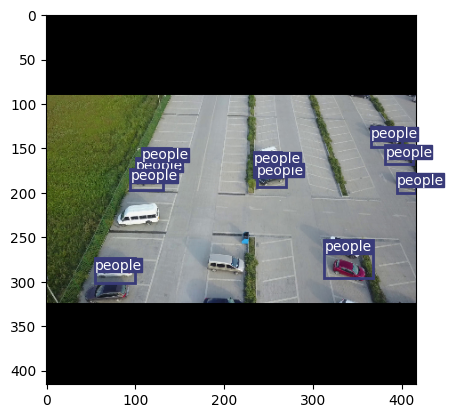

100%|██████████████████████████████████████████████████████████████████| 3013/3013 [10:59<00:00,  4.57it/s, loss=0.865]


=> Saving checkpoint
Currently epoch 6


100%|██████████████████████████████████████████████████████████████████████████████| 6634/6634 [03:24<00:00, 32.43it/s]


Class accuracy is: 100.000000%
No obj accuracy is: 99.544823%
Obj accuracy is: 36.075737%


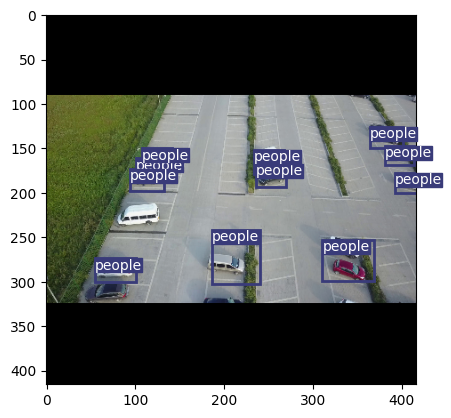

100%|██████████████████████████████████████████████████████████████████| 3013/3013 [10:58<00:00,  4.58it/s, loss=0.861]


=> Saving checkpoint
Currently epoch 7


100%|██████████████████████████████████████████████████████████████████████████████| 6634/6634 [03:21<00:00, 32.85it/s]


Class accuracy is: 100.000000%
No obj accuracy is: 99.486870%
Obj accuracy is: 37.953884%


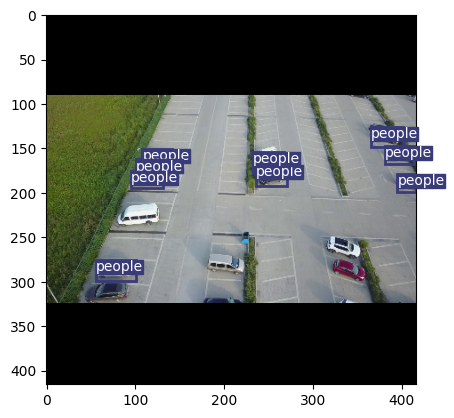

100%|██████████████████████████████████████████████████████████████████| 3013/3013 [10:53<00:00,  4.61it/s, loss=0.853]


=> Saving checkpoint
Currently epoch 8


100%|██████████████████████████████████████████████████████████████████████████████| 6634/6634 [03:22<00:00, 32.78it/s]


Class accuracy is: 100.000000%
No obj accuracy is: 99.485695%
Obj accuracy is: 37.979755%


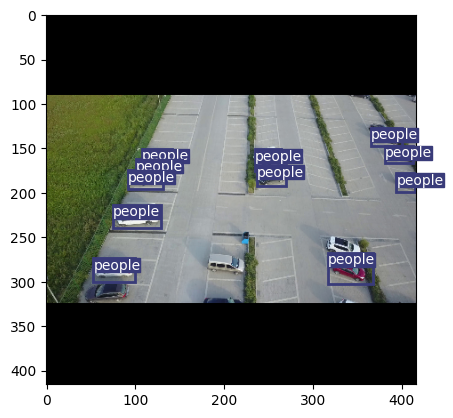

100%|██████████████████████████████████████████████████████████████████| 3013/3013 [10:56<00:00,  4.59it/s, loss=0.849]


=> Saving checkpoint
Currently epoch 9


100%|██████████████████████████████████████████████████████████████████████████████| 6634/6634 [03:23<00:00, 32.54it/s]


Class accuracy is: 100.000000%
No obj accuracy is: 99.513680%
Obj accuracy is: 37.536091%


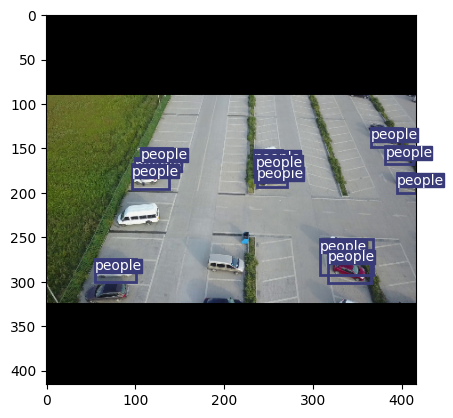

100%|██████████████████████████████████████████████████████████████████| 3013/3013 [10:57<00:00,  4.59it/s, loss=0.842]


=> Saving checkpoint
Currently epoch 10


100%|██████████████████████████████████████████████████████████████████████████████| 6634/6634 [03:22<00:00, 32.82it/s]


Class accuracy is: 100.000000%
No obj accuracy is: 99.539795%
Obj accuracy is: 36.879780%


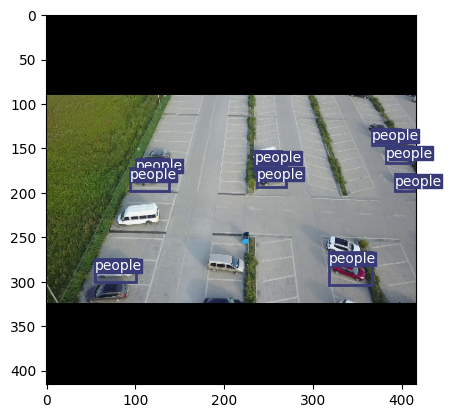

100%|███████████████████████████████████████████████████████████████████| 3013/3013 [10:57<00:00,  4.58it/s, loss=0.84]


=> Saving checkpoint
Currently epoch 11


100%|██████████████████████████████████████████████████████████████████████████████| 6634/6634 [03:21<00:00, 32.99it/s]


Class accuracy is: 100.000000%
No obj accuracy is: 99.481339%
Obj accuracy is: 38.605751%


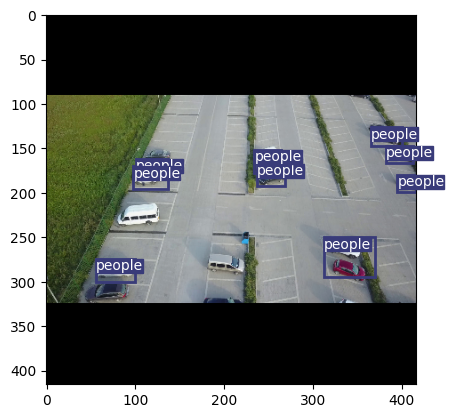

100%|██████████████████████████████████████████████████████████████████| 3013/3013 [10:58<00:00,  4.58it/s, loss=0.834]


=> Saving checkpoint
Currently epoch 12


100%|██████████████████████████████████████████████████████████████████████████████| 6634/6634 [03:19<00:00, 33.31it/s]


Class accuracy is: 100.000000%
No obj accuracy is: 99.540344%
Obj accuracy is: 35.894630%


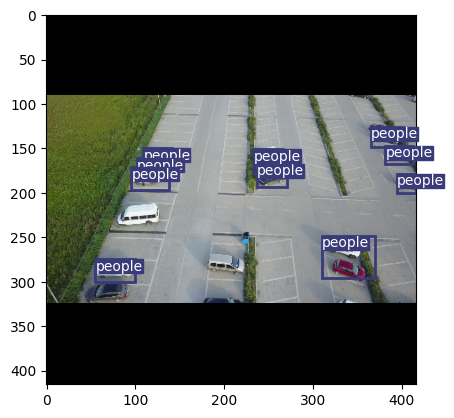

 93%|█████████████████████████████████████████████████████████████     | 2788/3013 [10:03<00:47,  4.73it/s, loss=0.829]

In [3]:
model = YOLOv3(num_classes=config.NUM_CLASSES).to(config.DEVICE)
optimizer = optim.Adam(
    model.parameters(), lr=config.LEARNING_RATE, weight_decay=config.WEIGHT_DECAY
)
loss_fn = YoloLoss()
scaler = torch.cuda.amp.GradScaler()

train_loader, test_loader, train_eval_loader = get_loaders(
    train_csv_path=config.DATASET + "/train.csv", test_csv_path=config.DATASET + "/test.csv", val_csv_path=config.DATASET +"/val.csv"
)

if config.LOAD_MODEL:
    load_checkpoint(
        config.CHECKPOINT_FILE, model, optimizer, config.LEARNING_RATE
    )

scaled_anchors = (
    torch.tensor(config.ANCHORS)
    * torch.tensor(config.S).unsqueeze(1).unsqueeze(1).repeat(1, 3, 2)
).to(config.DEVICE)

for epoch in range(config.NUM_EPOCHS):
    plot_couple_examples(model, test_loader, 0.6, 0.5, scaled_anchors)
    train_fn(train_loader, model, optimizer, loss_fn, scaler, scaled_anchors)

    if config.SAVE_MODEL:
        save_checkpoint(model, optimizer, filename=f"checkpoint.pth.tar")

    print(f"Currently epoch {epoch}")
#     print("On Train Eval loader:")
#     print("On Train loader:")
    check_class_accuracy(model, test_loader, threshold=config.CONF_THRESHOLD)

#     if epoch > 0 and epoch % 3 == 0:
#         check_class_accuracy(model, test_loader, threshold=config.CONF_THRESHOLD)
#         pred_boxes, true_boxes = get_evaluation_bboxes(
#             test_loader,
#             model,
#             iou_threshold=config.NMS_IOU_THRESH,
#             anchors=config.ANCHORS,
#             threshold=config.CONF_THRESHOLD,
#         )
#         mapval = mean_average_precision(
#             pred_boxes,
#             true_boxes,
#             iou_threshold=config.MAP_IOU_THRESH,
#             box_format="midpoint",
#             num_classes=config.NUM_CLASSES,
#         )
#         print(f"MAP: {mapval.item()}")
#         model.train()

In [11]:
pred_boxes, true_boxes = get_evaluation_bboxes(
    test_loader,
    model,
    iou_threshold=config.NMS_IOU_THRESH,
    anchors=config.ANCHORS,
    threshold=config.CONF_THRESHOLD,
)

100%|██████████| 6634/6634 [1:13:50<00:00,  1.50it/s]


In [20]:
pred_boxes[-1]

[6633,
 0.0,
 0.13935914635658264,
 0.4569958746433258,
 0.33749300241470337,
 0.015492173843085766,
 0.014618820510804653]

In [21]:
type(pred_boxes)

list

In [24]:
import csv
pred_boxes_path = "pred_boxes.txt"
true_boxes_path = "true_boxes.txt"
with open(pred_boxes_path, mode="w", newline="") as train_file:
    for idx in range(len(pred_boxes)):
        write_bbox = pred_boxes[idx]
        writer = csv.writer(train_file)
        writer.writerow(write_bbox)

with open(true_boxes_path, mode="w", newline="") as train_file:
    for idx in range(len(true_boxes)):
        write_bbox = pred_boxes[idx]
        writer = csv.writer(train_file)
        writer.writerow(write_bbox)

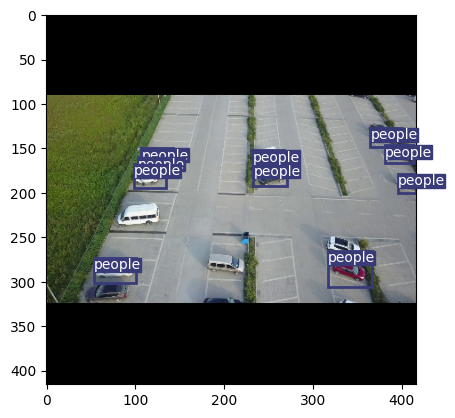

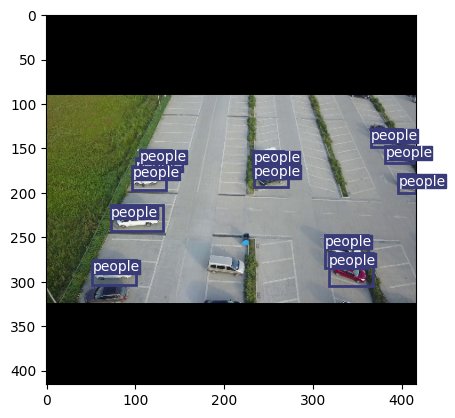

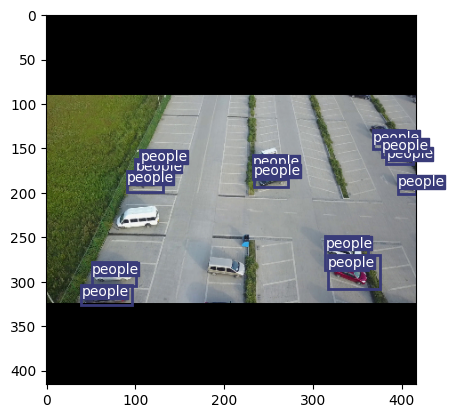

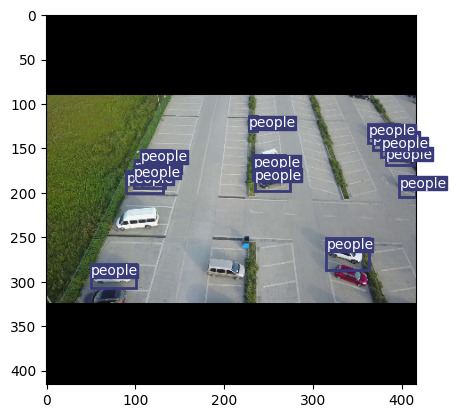

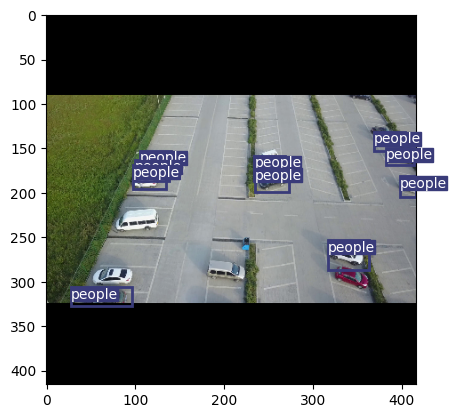

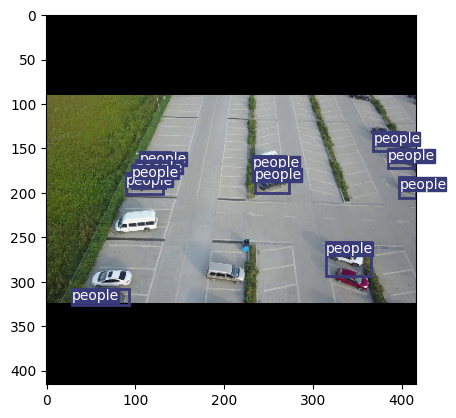

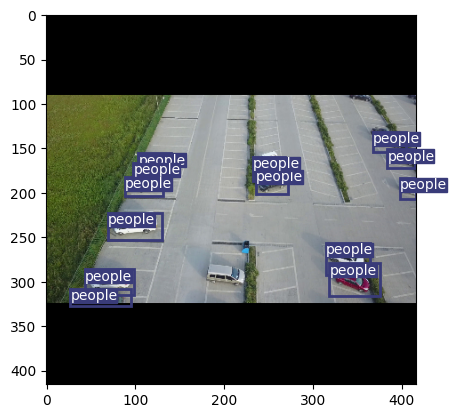

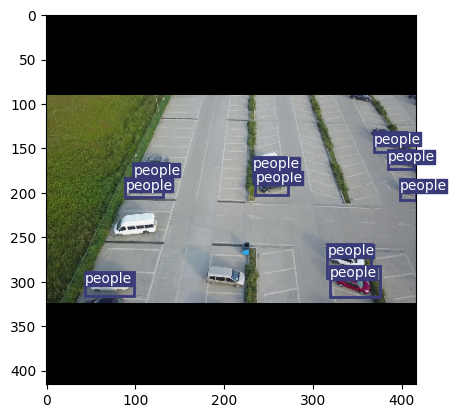

100%|████████████████████████████████████████████████████████████████████████████████| 830/830 [02:13<00:00,  6.20it/s]


Class accuracy is: 100.000000%
No obj accuracy is: 99.398384%
Obj accuracy is: 39.380249%


100%|██████████████████████████████████████████████████████████████████████████████| 830/830 [1:14:49<00:00,  5.41s/it]


In [5]:
plot_couple_examples(model, test_loader, 0.6, 0.5, scaled_anchors)
check_class_accuracy(model, test_loader, threshold=config.CONF_THRESHOLD)
pred_boxes, true_boxes = get_evaluation_bboxes(
    test_loader,
    model,
    iou_threshold=config.NMS_IOU_THRESH,
    anchors=config.ANCHORS,
    threshold=config.CONF_THRESHOLD,
)
mapval = mean_average_precision(
    pred_boxes,
    true_boxes,
    iou_threshold=config.MAP_IOU_THRESH,
    box_format="midpoint",
    num_classes=config.NUM_CLASSES,
)

In [6]:
print(f"MAP: {mapval.item()}")

MAP: 0.21870557963848114


In [2]:
model = YOLOv3(num_classes=config.NUM_CLASSES).to(config.DEVICE)
optimizer = optim.Adam(
    model.parameters(), lr=config.LEARNING_RATE, weight_decay=config.WEIGHT_DECAY
)
loss_fn = YoloLoss()
scaler = torch.cuda.amp.GradScaler()

train_loader, test_loader, train_eval_loader = get_loaders(
    train_csv_path=config.DATASET + "/train.csv", test_csv_path=config.DATASET + "/test.csv", val_csv_path=config.DATASET +"/val.csv"
)

if config.LOAD_MODEL:
    load_checkpoint(
        config.CHECKPOINT_FILE, model, optimizer, config.LEARNING_RATE
    )
    
scaled_anchors = (
    torch.tensor(config.ANCHORS)
    * torch.tensor(config.S).unsqueeze(1).unsqueeze(1).repeat(1, 3, 2)
).to(config.DEVICE)

=> Loading checkpoint


In [3]:
import numpy as np

In [10]:
model.eval()
# Test loader
loop = tqdm(test_loader, leave=True)

for batch_idx, (x, y) in enumerate(loop):

    x = x.to("cuda")
    with torch.no_grad():
        out = model(x) # 스케일 별 Conv (3, batch, 3, Gird, Grid, 7(5+2))
        bboxes = [[] for _ in range(x.shape[0])] # batch 갯수만큼 박스 생성
        for i in range(3): # 3개의 bbox
            batch_size, A, S, _, _ = out[i].shape 
            scaled_anchor = scaled_anchors[i]
            boxes_scale_i = cells_to_bboxes(out[i], scaled_anchor, S=S, is_preds=True)
            for idx, (box) in enumerate(boxes_scale_i):
                bboxes[idx] += box
    for i in range(batch_size):
        nms_boxes = non_max_suppression(bboxes[i], iou_threshold=iou_thresh, threshold=thresh, box_format="midpoint")
    print(nms_boxes)
    for box in nms_boxes:
        assert len(box) == 6, "box should contain class pred, confidence, x, y, width, height"
        class_pred = box[0]
        box = box[2:]
        print(box)
        break
    break

  0%|          | 0/6634 [00:18<?, ?it/s]


NameError: name 'iou_thresh' is not defined